In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
# importing the cifar dataset from keras
(train_images,train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [4]:
print(train_labels[0])
print(train_images[0])

[6]
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
# normalizing the dataset
train_images = train_images/255
test_images = test_images/255

In [6]:
# the target variable names
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

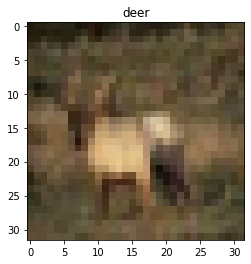

In [7]:
# showing the dataset
plt.imshow(train_images[3])
plt.title(class_names[train_labels[3][0]])
plt.show()

In [10]:
# splitting the dataset into train and evaluation
x_train = train_images[:40000]
y_train = train_labels[:40000]
x_eval = train_images[40000:]
y_eval = train_labels[40000:] 

In [11]:
print(x_train.shape)
print(y_train.shape)

(40000, 32, 32, 3)
(40000, 1)


In [12]:
# Building my model with convolution layer of (3,3) and pooling of (2,2)
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [14]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True,),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=1000,epochs=20,validation_data=(x_eval,y_eval))

Epoch 1/20
40/40 [==============================] - 62s 2s/step - loss: 2.1646 - accuracy: 0.1796 - val_loss: 2.0283 - val_accuracy: 0.2460
Epoch 2/20
40/40 [==============================] - 70s 2s/step - loss: 1.9136 - accuracy: 0.2982 - val_loss: 1.8102 - val_accuracy: 0.3407
Epoch 3/20
40/40 [==============================] - 66s 2s/step - loss: 1.7356 - accuracy: 0.3652 - val_loss: 1.6417 - val_accuracy: 0.4019
Epoch 4/20
40/40 [==============================] - 79s 2s/step - loss: 1.6118 - accuracy: 0.4041 - val_loss: 1.5342 - val_accuracy: 0.4417
Epoch 5/20
40/40 [==============================] - 63s 2s/step - loss: 1.5460 - accuracy: 0.4314 - val_loss: 1.4947 - val_accuracy: 0.4608
Epoch 6/20
40/40 [==============================] - 68s 2s/step - loss: 1.5013 - accuracy: 0.4515 - val_loss: 1.4413 - val_accuracy: 0.4865
Epoch 7/20
40/40 [==============================] - 73s 2s/step - loss: 1.4488 - accuracy: 0.4699 - val_loss: 1.3918 - val_accuracy: 0.5059
Epoch 8/20
40/40 [==

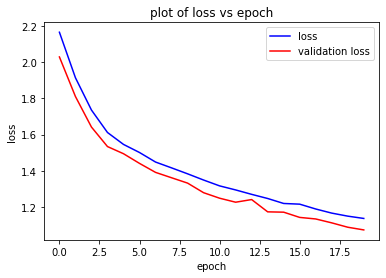

In [32]:
plt.plot(history.history['loss'],'blue',label='loss')
plt.plot(history.history['val_loss'],'red',label='validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.title('plot of loss vs epoch')
plt.show()

# Observation
we can run on more epochs since there is still room for improvement or we can start with a large learning rate (0.01) and gradually reduce it with learning rate decay in the callback

# **time to try transfer learning**

In [16]:
import tensorflow_datasets as tfds

In [17]:
# getting the cat vs dog dataset from tensorflow datasets
(x_train,x_eval,x_test), metadata = tfds.load('cats_vs_dogs',with_info=True,as_supervised=True,split=['train[:80%]','train[80%:90%]','train[90%:]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteLOR1PQ/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [18]:
# changing the label to string
labels = metadata.features['label'].int2str

In [19]:
# looking at the meta data
metadata

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

In [20]:
list(x_train.take(1)) # looking at one batch of the dataset

[(<tf.Tensor: shape=(262, 350, 3), dtype=uint8, numpy=
  array([[[242, 248, 248],
          [240, 246, 246],
          [235, 239, 238],
          ...,
          [188, 174, 127],
          [145, 133,  85],
          [161, 149, 101]],
  
         [[238, 244, 244],
          [239, 245, 245],
          [235, 239, 238],
          ...,
          [188, 176, 128],
          [165, 153, 105],
          [178, 168, 119]],
  
         [[237, 241, 240],
          [238, 242, 241],
          [232, 236, 235],
          ...,
          [200, 187, 142],
          [201, 191, 142],
          [200, 192, 143]],
  
         ...,
  
         [[130, 122,  75],
          [152, 146,  98],
          [154, 148,  98],
          ...,
          [161, 166, 136],
          [ 77,  86,  57],
          [ 71,  82,  52]],
  
         [[167, 159, 112],
          [105,  99,  51],
          [148, 142,  92],
          ...,
          [ 67,  73,  45],
          [ 46,  56,  29],
          [ 41,  54,  26]],
  
         [[138, 130,  8

(262, 350, 3) dog
255


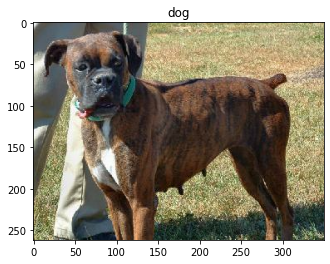

In [21]:
for image,label in x_train.take(1):
  plt.imshow(image)
  plt.title(labels(label))
  print(image.shape,labels(label))
  print(np.max(image))


In [23]:
def format(image,label):
  """ function that change the shape of the dataset and also normalize it"""
  image = tf.cast(image,tf.float32)
  image = image/255 # normalize the data set
  image = tf.image.resize(image,(160,160)) # resize the image
  return image,label

In [24]:
x_train= x_train.map(format)
x_eval = x_eval.map(format)
x_test = x_test.map(format)


(160, 160, 3) dog


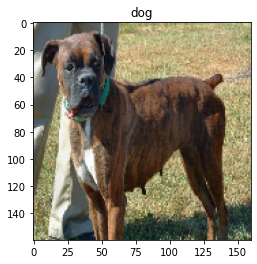

In [25]:
for image,label in x_train.take(1):
  plt.imshow(image)
  plt.title(labels(label))
  print(image.shape,labels(label))

In [26]:
x_train_batch = x_train.shuffle(1000).batch(32)
x_eval_batch = x_eval.batch(32)
x_test_batch = x_eval.batch(32)

In [27]:
# getting the base model for transfer learning
base_model = tf.keras.applications.MobileNetV2(input_shape=(160,160,3),include_top=False, weights='imagenet')
base_model.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [28]:
# making the model not retrain the parameters
base_model.trainable = False
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [29]:
model = Sequential([base_model,tf.keras.layers.GlobalAveragePooling2D(),Dense(1)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(x_train_batch,epochs=8,validation_data=x_eval_batch)

Epoch 1/8
582/582 [==============================] - 385s 653ms/step - loss: 0.0481 - accuracy: 0.9822 - val_loss: 0.0609 - val_accuracy: 0.9742
Epoch 2/8
582/582 [==============================] - 411s 703ms/step - loss: 0.0453 - accuracy: 0.9841 - val_loss: 0.0602 - val_accuracy: 0.9755
Epoch 3/8
582/582 [==============================] - 421s 721ms/step - loss: 0.0434 - accuracy: 0.9846 - val_loss: 0.0595 - val_accuracy: 0.9768
Epoch 4/8
582/582 [==============================] - 420s 719ms/step - loss: 0.0418 - accuracy: 0.9859 - val_loss: 0.0613 - val_accuracy: 0.9759
Epoch 5/8
582/582 [==============================] - 424s 726ms/step - loss: 0.0401 - accuracy: 0.9858 - val_loss: 0.0633 - val_accuracy: 0.9776
Epoch 6/8
582/582 [==============================] - 423s 724ms/step - loss: 0.0388 - accuracy: 0.9866 - val_loss: 0.0625 - val_accuracy: 0.9776
Epoch 7/8
582/582 [==============================] - 414s 708ms/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.0656 - val_ac

In [35]:
loss,accuracy = model.evaluate(x_test_batch,steps=20)

20/20 [==============================] - 16s 740ms/step - loss: 0.0738 - accuracy: 0.9734
